### Convolutional Neural Network

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
def drawImg(img,title = "Image"):
    plt.imshow(img)
    plt.axis("off")
    plt.style.use("seaborn")
    plt.title(title+str(img.shape))
    plt.show()

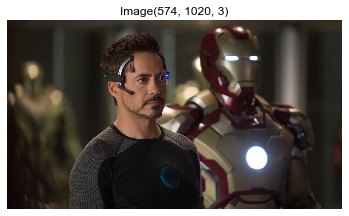

In [3]:
img_ = cv2.imread("Tony Stark.jpg")
img_ = cv2.cvtColor(img_,cv2.COLOR_BGR2RGB)
drawImg(img_)

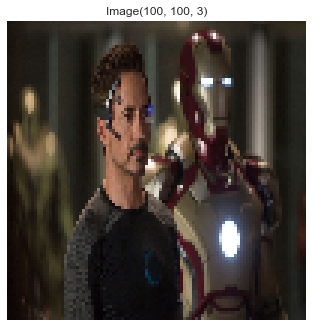

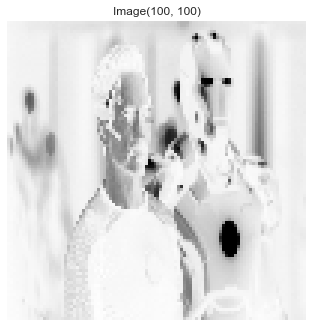

In [4]:
img = cv2.resize(img_,(100,100))
img_gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
drawImg(img)
drawImg(img_gray)

In [5]:
def convolution(img,img_filter):
    W = img.shape[0]
    H = img.shape[1]
    
    F = img_filter.shape[0] #3
    new_img = np.zeros((W-F+1,H-F+1))
    
    for row in range(W-F+1):
        for col in range(H-F+1):
            for i in range(F):
                for j in range(F):
                    new_img[row][col] += img[row+i][col+j]*img_filter[i][j]
                    
                    if new_img[row][col] >255:
                        new_img[row][col] = 255
                    
                    elif new_img[row][col] < 0:
                        new_img[row][col] = 0
    return new_img  #Activation Map

In [6]:
blur_filter = np.ones((3,3))/9.0
print(blur_filter)

[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


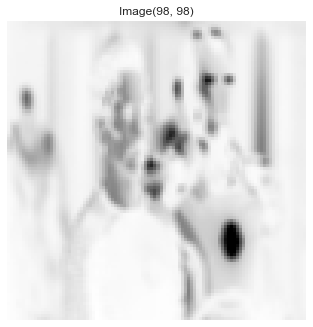

In [7]:
output1 = convolution(img_gray,blur_filter)
drawImg(output1)

In [8]:
edge_filter = np.array([[1,0,-1],[1,0,-1],[1,0,-1]])
outputs = convolution(img_gray,edge_filter*2)

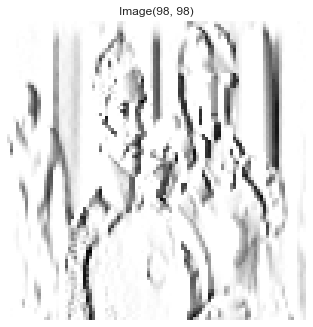

In [9]:
drawImg(outputs)

### Implementation Pooling

In [10]:
X = np.array([[1,0,2,3],[4,6,6,8],[3,1,1,0],[1,2,2,4]])

def pooling(X,mode = "max"):
    stride = 2
    f = 2
    H,W = X.shape
    
    HO = int((H-f)/stride) + 1
    WO = int((W-f)/stride) + 1
    
    output = np.zeros((HO,WO))
    
    for r in range(HO):
        for c in range(WO):
            r_start = r*stride
            r_end = r_start + f
            c_start = c*stride
            c_end = c_start + f
            
            X_slice = X[r_start:r_end,c_start:c_end]
            if mode == "max":
                output[r][c] = np.max(X_slice)
            else:
                output[r][c] = np.mean(X_slice)
        
    return output

In [11]:
pooling_output = pooling(X)
print(pooling_output)

[[6. 8.]
 [3. 4.]]


In [12]:
pooling_output = pooling(outputs)

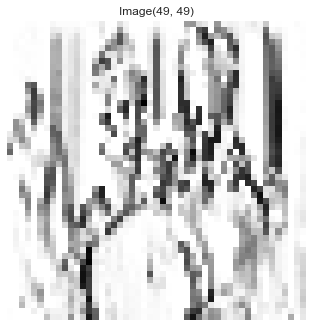

In [13]:
drawImg(pooling_output)

In [14]:
#!pip install keras

In [15]:
#!pip install tensorflow

### CNN using Keras

#### Dataset Fashion MNIST

In [16]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Input,Convolution2D,MaxPooling2D,Flatten,Dense,Dropout
from keras.utils import np_utils
import tensorflow

Using TensorFlow backend.


##### Data Preparation

In [17]:
x = pd.read_csv("fashion-mnist_train.csv")
X_ = np.array(x)
X = X_[:,1:]
X = X/255.0
y = X_[:,0]
print(X.shape,y.shape)  #10 classes

(60000, 784) (60000,)


In [18]:
np.unique(y,return_counts = True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

In [19]:
X_train = X.reshape((-1,28,28,1))
Y_train = np_utils.to_categorical(y)

print(X_train.shape,Y_train.shape)

(60000, 28, 28, 1) (60000, 10)


In [20]:
import matplotlib.pyplot as plt

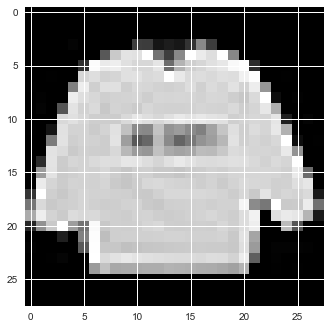

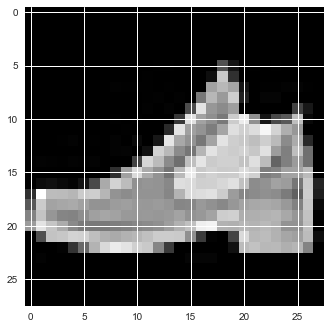

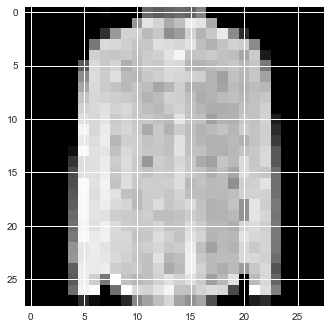

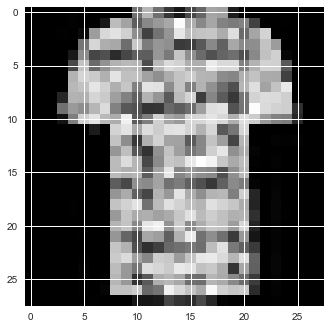

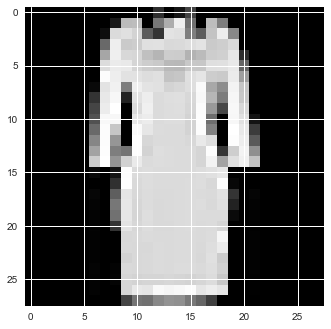

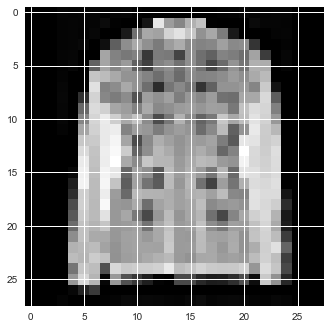

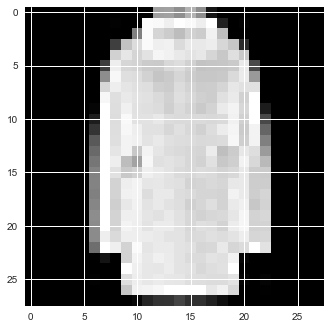

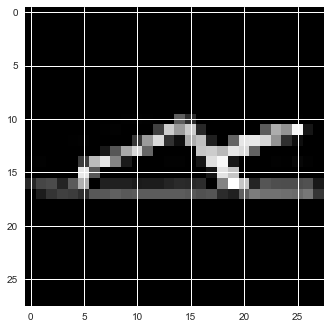

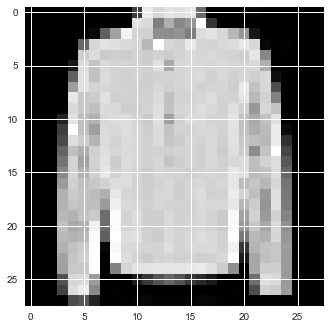

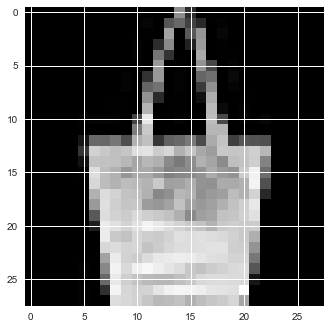

In [21]:
for i in range(10):
    plt.imshow(X_train[i].reshape(28,28),cmap = "gray")
    plt.show()

### CNN Model

In [22]:
model = Sequential()
model.add(Convolution2D(32,(3,3),activation = 'relu',input_shape = (28,28,1)))
model.add(Convolution2D(64,(3,3),activation = 'relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(32,(5,5),activation = 'relu'))
model.add(Convolution2D(8,(3,3),activation = 'relu'))
model.add(Flatten())
model.add(Dense(10,activation = 'softmax'))
model.summary()



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 32)          51232     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 6, 6, 8)           2312      
_________________________________________________________________
flatten_1 (Flatten)          (None, 288)              

In [21]:
model.compile(loss = "categorical_crossentropy",optimizer = "adam",metrics = ["accuracy"])
#hist = model.fit(X_train,Y_train,epochs = 8 ,shuffle = True ,batch_size = 256,validation_split = 0.20)

Train on 48000 samples, validate on 12000 samples
Epoch 1/8
48000/48000 [==============================] - 100s 2ms/step - loss: 0.7570 - accuracy: 0.7227 - val_loss: 0.5084 - val_accuracy: 0.8295
Epoch 2/8
48000/48000 [==============================] - 109s 2ms/step - loss: 0.4346 - accuracy: 0.8433 - val_loss: 0.4397 - val_accuracy: 0.8510
Epoch 3/8
48000/48000 [==============================] - 100s 2ms/step - loss: 0.3731 - accuracy: 0.8655 - val_loss: 0.4101 - val_accuracy: 0.8527
Epoch 4/8
48000/48000 [==============================] - 104s 2ms/step - loss: 0.3357 - accuracy: 0.8803 - val_loss: 0.3478 - val_accuracy: 0.8835
Epoch 5/8
48000/48000 [==============================] - 103s 2ms/step - loss: 0.3074 - accuracy: 0.8907 - val_loss: 0.3460 - val_accuracy: 0.8818
Epoch 6/8
48000/48000 [==============================] - 104s 2ms/step - loss: 0.2913 - accuracy: 0.8963 - val_loss: 0.3311 - val_accuracy: 0.8835
Epoch 7/8
48000/48000 [==============================] - 103s 2ms/st

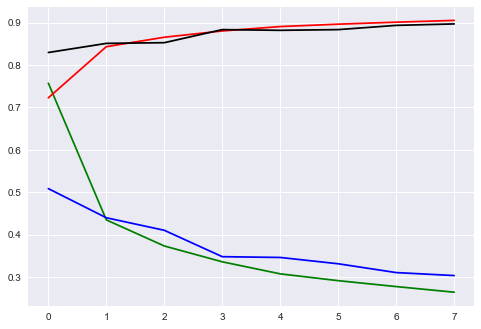

In [28]:
plt.figure(0)
plt.plot(hist.history['loss'],'g')
plt.plot(hist.history["val_loss"],'b')

plt.plot(hist.history['accuracy'],'r')
plt.plot(hist.history['val_accuracy'],'black')
plt.show()

### Image data Augmentation

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from keras.preprocessing import image

In [11]:
img_path = "Tony Stark.jpg"
img = image.load_img(img_path,target_size = (100,100))
x = image.img_to_array(img)/255.0

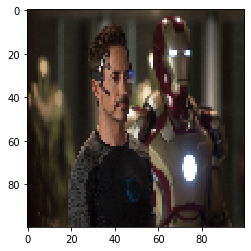

(100, 100, 3)


In [20]:
plt.imshow(x)
plt.axis = ("off")
plt.show()
print(x.shape)

In [21]:
x = x.reshape((1,100,100,3))

In [24]:
datagen = image.ImageDataGenerator(
        rotation_range = 30,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = "nearest"
)

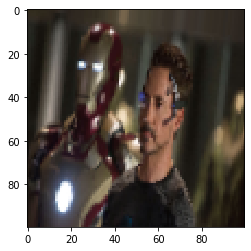

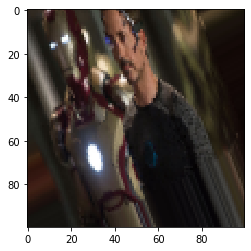

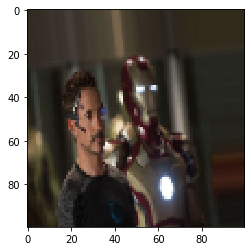

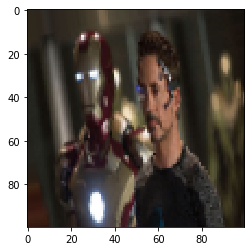

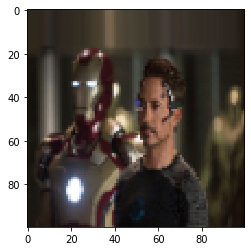

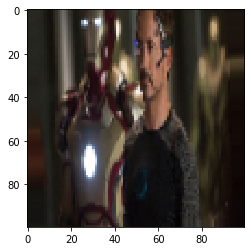

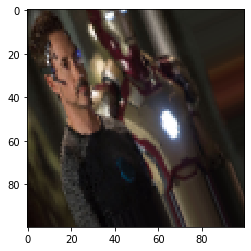

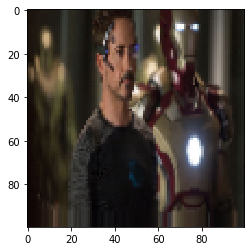

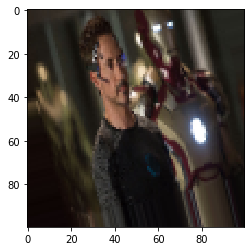

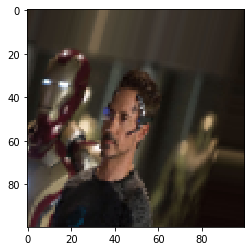

In [28]:
i = 0

for batch in datagen.flow(x,batch_size = 1):
    plt.figure()
    imgplot = plt.imshow(image.img_to_array(batch[0]))
    i += 1
    if i == 10:
        break
    plt.show()